# importing important libraries and packages

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#creating columns names list because in our data file there are not appropriate names 
columns=['Sepal Length','Sepal Width','Petel Length','Petel Width','Class_labels'] 
# loading data
df = pd.read_csv("C:\\Users\\TAMANNA\\Downloads\\iris.data", names=columns)
df.head()

,Sepal Length,Sepal Width,Petel Length,Petel Width,Class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## some basic statistical analysis about the data using 'describe()' : an in-built function 

In [4]:
df.describe()

,Sepal Length,Sepal Width,Petel Length,Petel Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# visualize the dataset

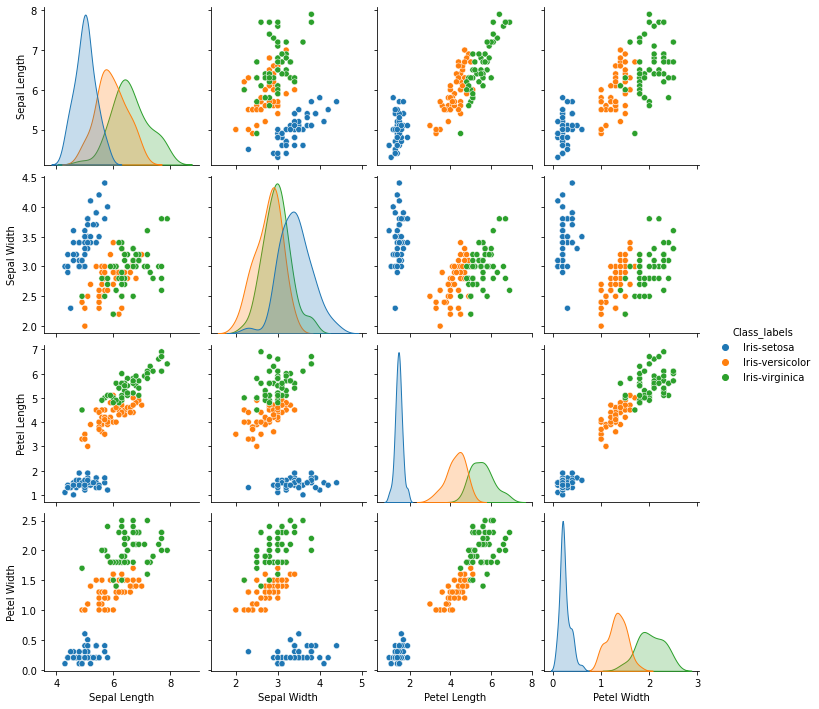

In [5]:
sns.pairplot(df, hue='Class_labels')

## from this visualization we can see that:
- Iris-setosa is well separated from the other two flowers <br>
- Iris-virginica is the longest flower and iris-setosa is the shortest

# separate features and target

In [27]:
feature_names = df.columns
feature_names

Index(['Sepal Length', 'Sepal Width', 'Petel Length', 'Petel Width',
       'Class_labels'],
      dtype='object')

In [34]:
X = df.drop(columns="Class_labels")
Y = df.Class_labels
Feature_names = X.columns
Class_labels = Y.unique()
Feature_names
Class_labels

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [17]:
# calculate average of each features for all classes
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1]) for j in (np.unique(Y))]) 
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0,1)
X_axis = np.arange(len(columns)-1)
width = 0.25

# Plot the average

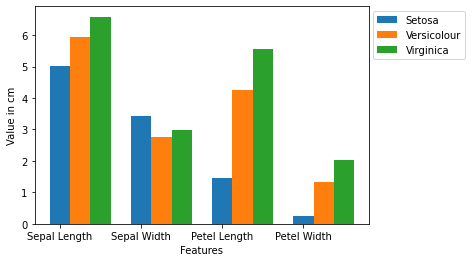

In [8]:
plt.bar(X_axis, Y_Data_reshaped[0], width, label="Setosa")
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label="Versicolour")
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label="Virginica")
plt.xticks(X_axis, columns[0:4])
plt.xlabel("Features")
plt.ylabel("Value in cm")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

# model training 

In [9]:
# split the data to train and test dataset.
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
# Decision tree algorithm 
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3,random_state=42)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [11]:
# Predict from the test dataset
predictions = clf.predict(X_test)

In [12]:
# calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predictions)

0.9333333333333333

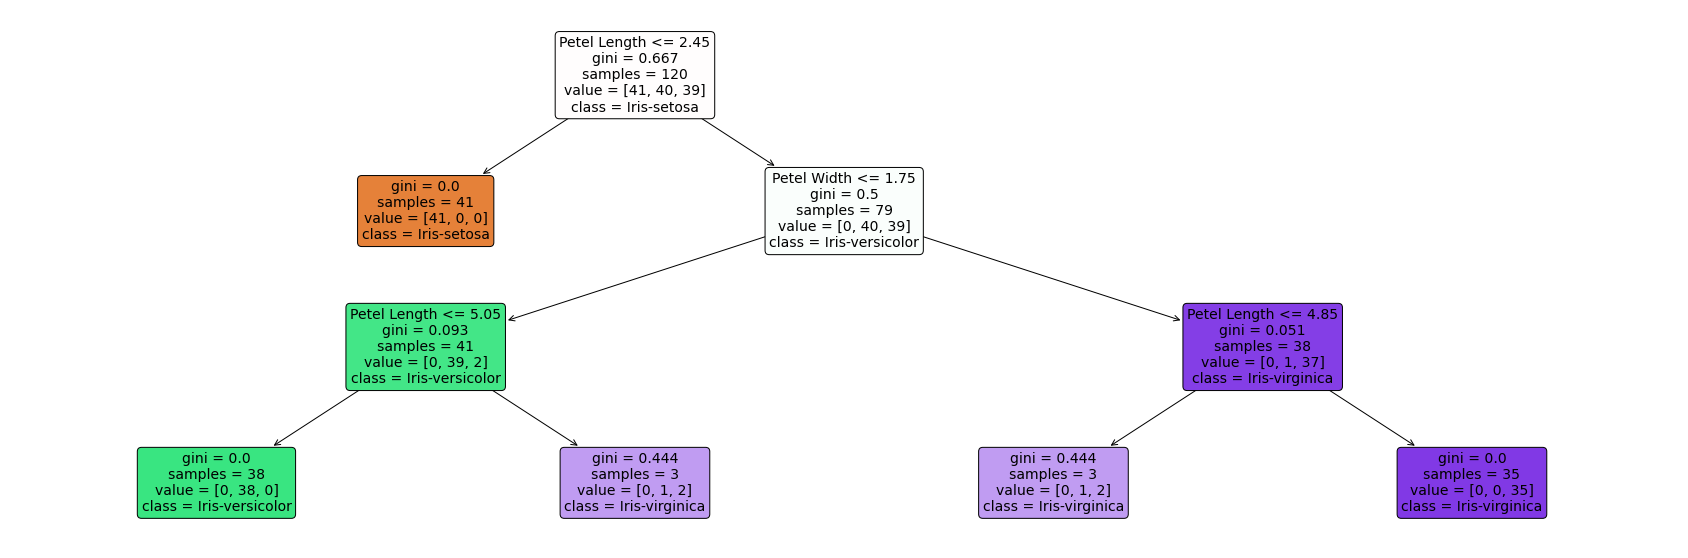

In [36]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10),facecolor='w')
a = tree.plot_tree(clf,feature_names=Feature_names,class_names=Class_labels,rounded=True,filled=True,fontsize=14)
plt.show()

In [39]:
from sklearn.tree import export_text
tree_rules = export_text(clf,feature_names=list(Feature_names))
print(tree_rules)

|--- Petel Length <= 2.45
|   |--- class: Iris-setosa
|--- Petel Length >  2.45
|   |--- Petel Width <= 1.75
|   |   |--- Petel Length <= 5.05
|   |   |   |--- class: Iris-versicolor
|   |   |--- Petel Length >  5.05
|   |   |   |--- class: Iris-virginica
|   |--- Petel Width >  1.75
|   |   |--- Petel Length <= 4.85
|   |   |   |--- class: Iris-virginica
|   |   |--- Petel Length >  4.85
|   |   |   |--- class: Iris-virginica

